[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ishikamanghwani/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishikamanghwani/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ishikamanghwani/nltk_data...


Topic 0:
['model', 'method', 'quantum', 'data', 'field', 'result', 'state', 'problem', 'function', 'theory', 'using']
Topic 1:
['network', 'learning', 'method', 'data', 'algorithm', 'image', 'task', 'performance', 'model', 'problem', 'training']
Topic 2:
['galaxy', 'star', 'mass', 'model', 'data', 'cluster', 'emission', 'stellar', 'xray', 'source', 'observation']
Topic 3:
['quantum', 'state', 'spin', 'phase', 'magnetic', 'transition', 'interaction', 'temperature', 'model', 'electron', 'network']
Topic 4:
['quantum', 'galaxy', 'graph', 'star', 'state', 'cluster', 'algorithm', 'group', 'entanglement', 'algebra', 'emission']
Topic 5:
['equation', 'solution', 'problem', 'algorithm', 'method', 'time', 'wave', 'numerical', 'nonlinear', 'function', 'stochastic']
Topic 6:
['quantum', 'mass', 'dark', 'neutrino', 'model', 'black', 'matter', 'hole', 'equation', 'galaxy', 'solution']
Topic 7:
['graph', 'neutrino', 'decay', 'algorithm', 'bound', 'quark', 'mass', 'vertex', 'energy', 'state', 'number

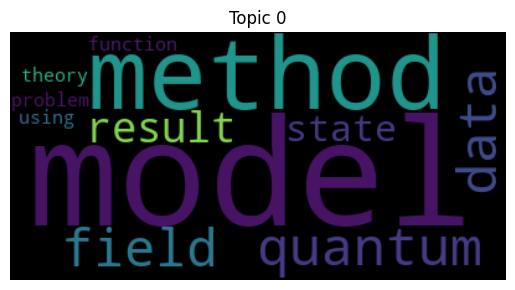

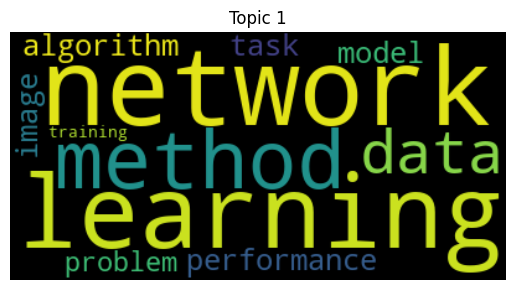

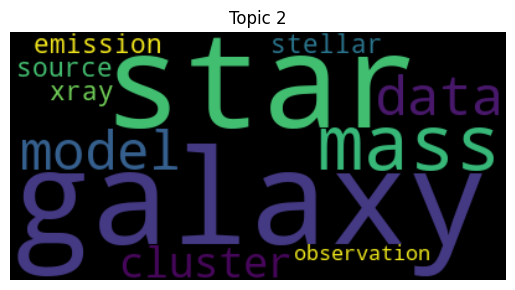

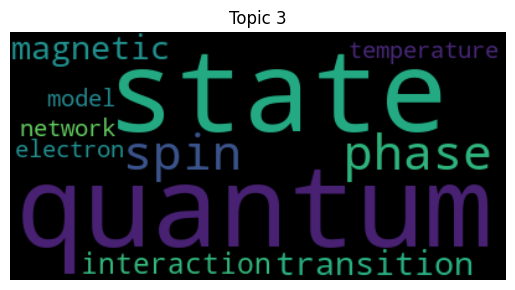

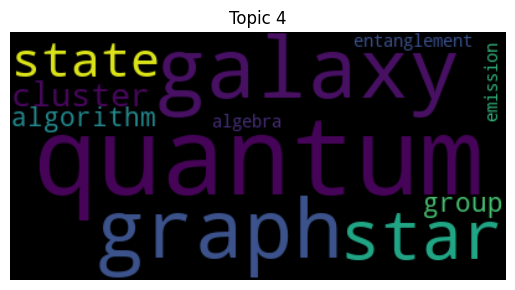

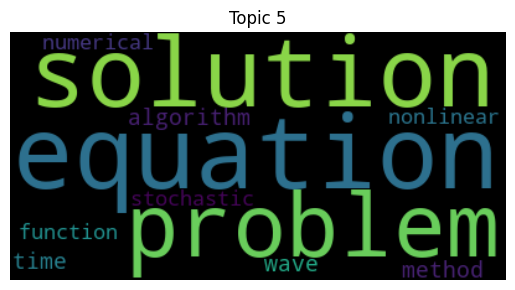

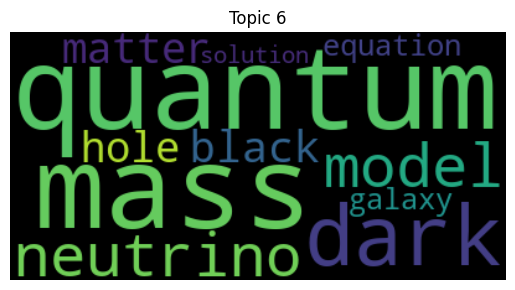

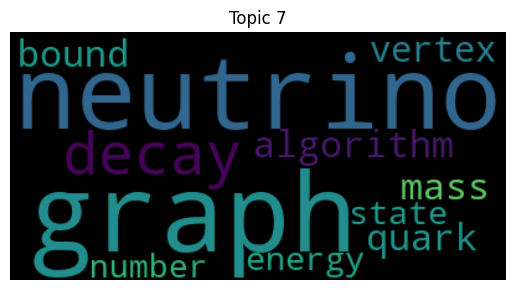

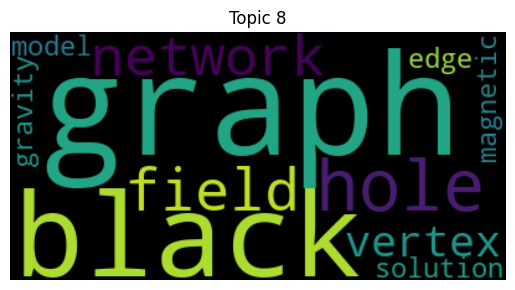

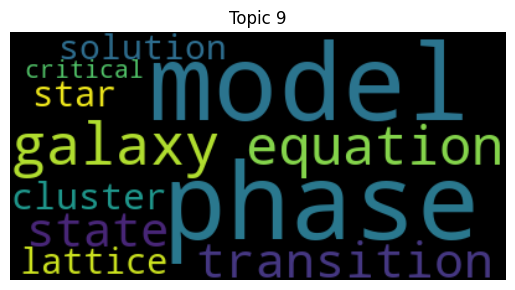

In [7]:
import pandas as pd
import json
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
with open('arxiv-metadata-oai-snapshot.json', 'r') as f:
    data = [json.loads(line) for line in f]
df = pd.DataFrame(data)[['title', 'abstract']].dropna()

# Preprocess text
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()])

df['cleaned_abstract'] = df['abstract'].apply(preprocess_text)

# Create TF-IDF matrix
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_abstract'])

# Apply SVD for LSA
n_topics = 10
svd_model = TruncatedSVD(n_components=n_topics, random_state=42)
topic_matrix = svd_model.fit_transform(tfidf_matrix)

# Inspect topics
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(svd_model.components_):
    print(f"Topic {i}:")
    print([terms[j] for j in topic.argsort()[:-11 - 1:-1]])

# Assign topics to documents
df['topic'] = topic_matrix.argmax(axis=1)

# Visualize topics using word clouds
for i, topic in enumerate(svd_model.components_):
    wordcloud = WordCloud().generate(' '.join([terms[j] for j in topic.argsort()[:-11 - 1:-1]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {i}")
    plt.axis("off")
    plt.show()
